In [39]:
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt

In [34]:
estatura = np.array([1.77, 1.74, 1.72, 1.78, 1.65, 1.66, 1.64, 1.85, 1.85,1.75, 1.73, 1.79, 1.82, 1.65, 1.79, 1.72, 1.70, 1.57, 1.66, 1.75, 1.77])
edad = np.array([26, 31, 24, np.nan, 32, np.nan, np.nan, 34, 26, 21, 23, np.nan, 24, 25, 25, 34, 26, 25, 26, 27, 32])
print(estatura.shape)
print(edad.shape)

(21,)
(21,)


In [44]:
mean = int(np.nanmean(edad))
edad = np.array([mean if np.isnan(x) else int(x) for x in edad])
edad

array([26, 31, 24, 27, 32, 27, 27, 34, 26, 21, 23, 27, 24, 25, 25, 34, 26,
       25, 26, 27, 32])

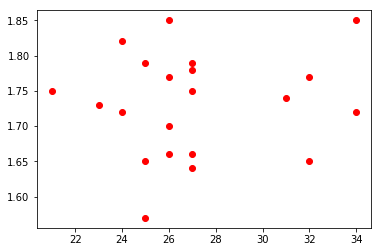

In [45]:
plt.plot(edad, estatura,'ro')
plt.show()

In [63]:
X = np.array((edad, estatura))
X = X.T

In [69]:

def estimateGaussian(X):
    n = np.size(X, 1)
    m = np.size(X, 0)
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    
    mu = np.reshape((1/m)*np.sum(X, 0), (1, n))
    sigma2 = np.reshape((1/m)*np.sum(np.power((X - mu),2), 0),(1, n))
    
    return mu, sigma2

mu, sigma2 = estimateGaussian(X)
print('mean: ',mu,' variance: ',sigma2)

mean:  [[27.0952381   1.73142857]]  variance:  [[1.18956916e+01 5.14557823e-03]]


In [70]:

def multivariateGaussian(X, mu, sigma2):
     n = np.size(sigma2, 1)
     m = np.size(sigma2, 0)
     #print(m,n)
     
     if n == 1 or m == 1:
        # print('Yes!')
         sigma2 = np.diag(sigma2[0, :])
     #print(sigma2)
     X = X - mu
     pi = math.pi
     det = np.linalg.det(sigma2)
     inv = np.linalg.inv(sigma2)
     val = np.reshape((-0.5)*np.sum(np.multiply((X@inv),X), 1),(np.size(X, 0), 1))
     #print(val.shape)
     p = np.power(2*pi, -n/2)*np.power(det, -0.5)*np.exp(val)
     
     return p

In [71]:
p = multivariateGaussian(X, mu, sigma2)
print(p.shape)

(21, 1)


In [88]:
Xval = np.array([[0.25, 2.4], [23, 1.77], [2.5, 175.1], [250, 0.15], [14, 150]])
yval = np.array([[1], [0], [1], [1], [1]])
pval = multivariateGaussian(Xval, mu, sigma2)

In [80]:
def selectThreshHold(yval, pval):
    
    F1 = 0
    bestF1 = 0
    bestEpsilon = 0
    
    stepsize = (np.max(pval) - np.min(pval))/1000
        
    epsVec = np.arange(np.min(pval), np.max(pval), stepsize)
    noe = len(epsVec)
    
    for eps in range(noe):
        epsilon = epsVec[eps]
        pred = (pval < epsilon)
        prec, rec = 0,0
        tp,fp,fn = 0,0,0
        
        try:
            for i in range(np.size(pval,0)):
                if pred[i] == 1 and yval[i] == 1:
                    tp+=1
                elif pred[i] == 1 and yval[i] == 0:
                    fp+=1
                elif pred[i] == 0 and yval[i] == 1:
                    fn+=1
            prec = tp/(tp + fp)
            rec = tp/(tp + fn)
            F1 = 2*prec*rec/(prec + rec)
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon
        except ZeroDivisionError:
            print('Warning dividing by zero!!')          
       
    return bestF1, bestEpsilon

In [89]:

F1, epsilon = selectThreshHold(yval, pval)
print('Epsilon and F1 are:',epsilon, F1)

Warning dividing by zero!!
Epsilon and F1 are: 0.0002750944339173196 1.0


In [94]:
outl = (p < epsilon)
outl

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [91]:

def findIndices(binVec):
    l = []
    for i in range(len(binVec)):
        if binVec[i] == 1:
            l.append(i)
    return l

In [93]:
listOfOutliers = findIndices(outl)
count_outliers = len(listOfOutliers)
print('\n\nNumber of outliers:', count_outliers)
print('\n',listOfOutliers)



Number of outliers: 0

 []


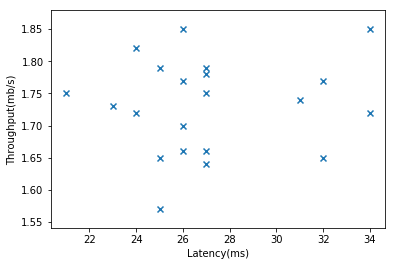

In [95]:
plt.scatter(X[:, 0], X[:, 1], marker = "x")
plt.xlabel('Latency(ms)')
plt.ylabel('Throughput(mb/s)')
plt.scatter(X[listOfOutliers,0], X[listOfOutliers, 1], facecolors = 'none', edgecolors = 'r')
plt.show()